# Pymaceuticals Inc.
---

### Analysis

- Drug Regimen Ramicane and Capomulin had the lowest mean tumor volume. lowest variance, and lowest standard errors. With Ramicane being slighlty better in all categories
- Drug Regimen Ramicane and Capomulin where the only samples that had more than 200 mice making them more reliable due to the Law of Large Numbers
- The weight of the mice and the average tumor size have a positive correlation, which makes since as the mice that have larger tumors will also weigh more. 
- On one particular mouse (s185) that took the Drug Regimen Capomulin was able to show a 48% reduction in tumor size in 45 days. 
 

In [418]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [419]:
# Checking the number of mice.
total_mice = combined["Mouse ID"].nunique()
total_mice

249

In [420]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [421]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = combined.set_index("Mouse ID")
duplicate_ids = duplicate_id.loc[{"g989"}, {"Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"}]
duplicate_ids

C:\Users\bmrop\AppData\Local\Temp\ipykernel_14584\862034296.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  duplicate_ids = duplicate_id.loc[{"g989"}, {"Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"}]


,Age_months,Weight (g),Metastatic Sites,Tumor Volume (mm3),Timepoint,Sex,Drug Regimen
Mouse ID,,,,,,,
g989,21,26,0,45.000000,0,Female,Propriva
g989,21,26,0,45.000000,0,Female,Propriva
g989,21,26,0,48.786801,5,Female,Propriva
g989,21,26,0,47.570392,5,Female,Propriva
g989,21,26,0,51.745156,10,Female,Propriva
g989,21,26,0,49.880528,10,Female,Propriva
g989,21,26,1,51.325852,15,Female,Propriva
g989,21,26,0,53.442020,15,Female,Propriva
g989,21,26,1,55.326122,20,Female,Propriva


In [443]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Cleaned_df = combined[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
cleaned_df = combined.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
#cleaned_df
new_df = cleaned_df[cleaned_df['Mouse ID'] != 'g989']
new_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [423]:
# Checking the number of mice in the clean DataFrame.
total_mice = new_df["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [424]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_mean = new_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_regimen_median = new_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
drug_regimen_variance = new_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
drug_regimen_sd = new_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
drug_regimen_sem = new_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

tumor_volume_df = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, "Median Tumor Volume": drug_regimen_median, "Tumor Volume Variance": drug_regimen_variance, "Tumor Volume Std. Dev.": drug_regimen_sd, "Tumor Volume Std. Err.": drug_regimen_sem})
tumor_volume_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [425]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
new_df.groupby("Drug Regimen", as_index=True).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

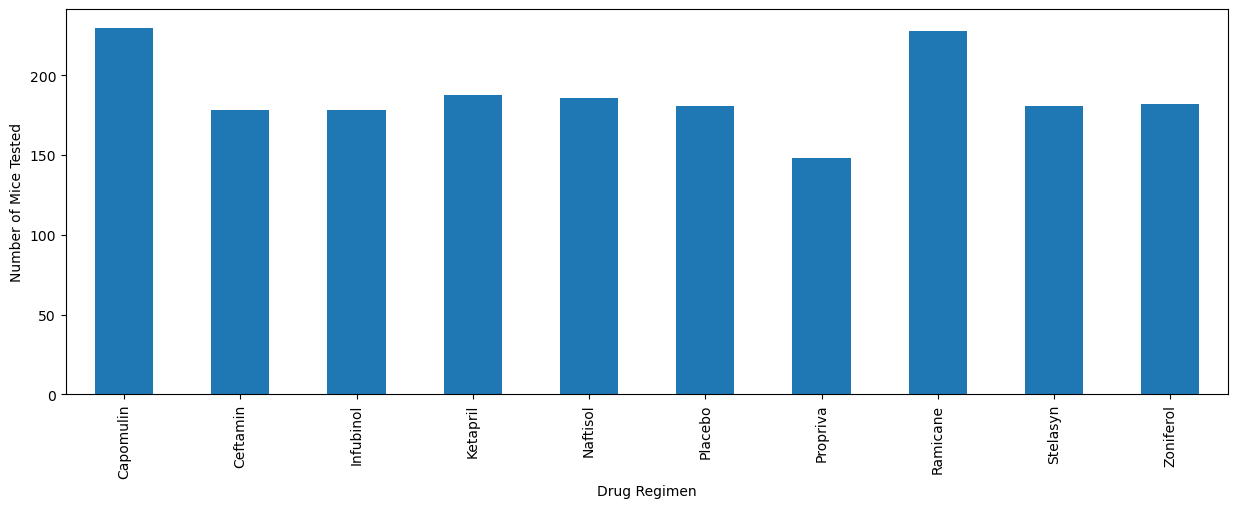

<Figure size 640x480 with 0 Axes>

In [426]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_and_regimen = new_df.groupby("Drug Regimen")
count_timepoints = timepoints_and_regimen["Timepoint"].count()
count_chart = count_timepoints.plot(kind="bar", figsize=(15,5))
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()


([<matplotlib.axis.XTick at 0x1ae3baefdc0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

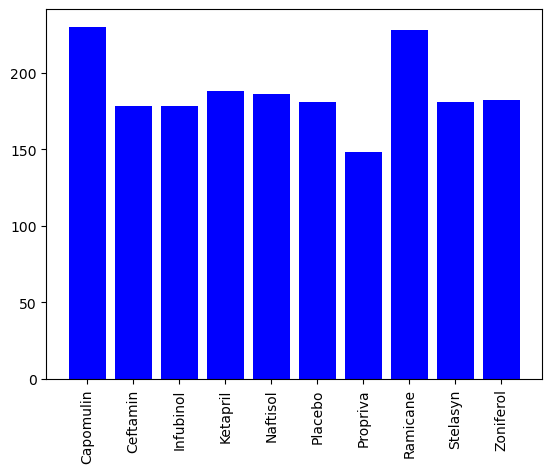

In [427]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_timepoints
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
counts  = [230,178,178,188,186,181,148,228,181,182]
x_axis = np.arange(len(counts))
plt.bar(x_axis,counts,color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation=90)

<AxesSubplot:ylabel='Sex'>

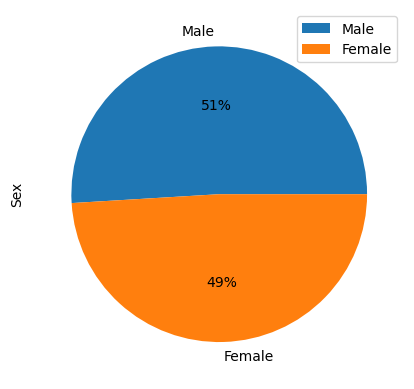

In [428]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = new_df["Sex"].value_counts()
sex_df = pd.DataFrame(sex)
sex_df.plot(kind="pie", y = "Sex", autopct="%1.0f%%") 



([<matplotlib.patches.Wedge at 0x1ae3c0133a0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.03458574199546124, -1.149479806891197, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.01954846286699983, -0.6497059778080678, '49.0%')])

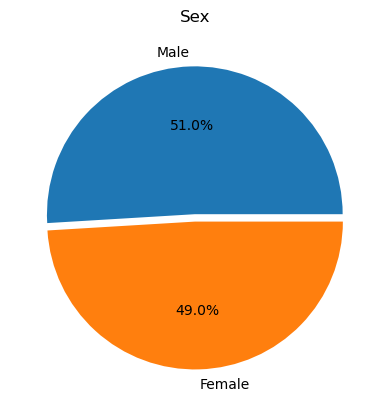

In [429]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex = new_df["Sex"].value_counts()
#sex
gender = ["Male","Female"]
count_gender = [958, 922]
explode = (0,0.05)
plt.title("Sex")
plt.pie(count_gender, explode=explode, labels=gender, autopct="%1.1f%%")



## Quartiles, Outliers and Boxplots

In [430]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_reduced = new_df.drop((new_df.index[new_df["Drug Regimen"]!="Capomulin"])&(new_df.index[new_df["Drug Regimen"]!="Ramicane"])&(new_df.index[new_df["Drug Regimen"]!="Infubinol"])&(new_df.index[new_df["Drug Regimen"]!="Ceftamin"]))


# Start by getting the last (greatest) timepoint for each mouse
regimen_timepoint_reduced =  new_df.groupby("Mouse ID")["Timepoint"].max()
regimen_timepoint_reduced = regimen_timepoint_reduced.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimen_reduced = regimen_reduced.merge(regimen_timepoint_reduced, on=("Mouse ID", "Timepoint"))
merged_df = regimen_timepoint_reduced.merge(new_df, on=("Mouse ID", "Timepoint"))
merged_df



C:\Users\bmrop\AppData\Local\Temp\ipykernel_14584\3270600058.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  regimen_reduced = new_df.drop((new_df.index[new_df["Drug Regimen"]!="Capomulin"])&(new_df.index[new_df["Drug Regimen"]!="Ramicane"])&(new_df.index[new_df["Drug Regimen"]!="Infubinol"])&(new_df.index[new_df["Drug Regimen"]!="Ceftamin"]))


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [431]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]                      

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds 
for drug in Drugs:
        outlier_data = merged_df.loc[merged_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
        tumor_volume_data.append(outlier_data)
        tumor_volume_data.append(drug)
        quartiles = outlier_data.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        possible_outlier = outlier_data.loc[(outlier_data < lower_bound) | (outlier_data > upper_bound)]
        
        print(f"{drug}'s potential outliers: {possible_outlier}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

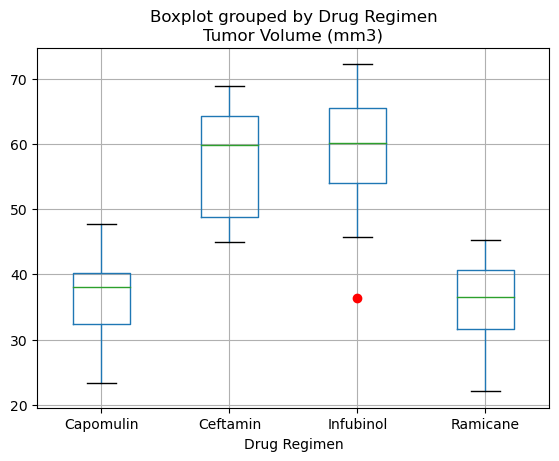

In [432]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#regimen_reduced
regimen_reduced.boxplot(column="Tumor Volume (mm3)",by="Drug Regimen", sym='r')

## Line and Scatter Plots

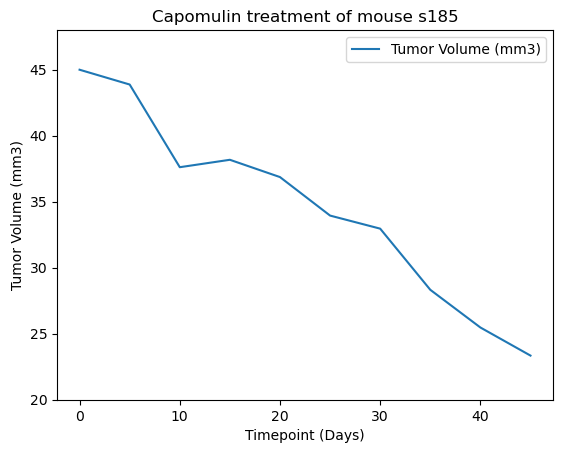

In [445]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimen_reduced_capomulin = new_df.drop((new_df.index[new_df["Drug Regimen"]!="Capomulin"]))
regimen_reduced_capomulin1 = new_df.drop((new_df.index[new_df["Mouse ID"]!="s185"]))
regimen_reduced_capomulin1
regimen_reduced_capomulin1.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.ylim(20,48)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
                                                


Text(0, 0.5, 'Average Tumor Volume (mm3)')

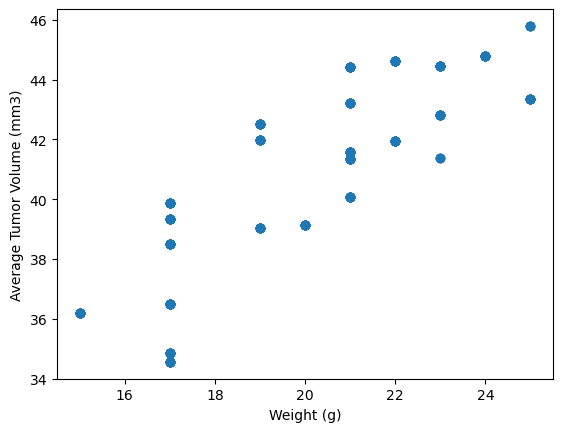

In [442]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_average_capomulin = regimen_reduced_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
tumor_average_capomulin = regimen_reduced_capomulin.merge(tumor_average_capomulin, on=("Mouse ID"))
tumor_average_capomulin = tumor_average_capomulin.rename(columns={"Tumor Volume (mm3)_y":"Average Tumor Volume"})
tumor_average_capomulin
plt.scatter(tumor_average_capomulin.iloc[:,4],tumor_average_capomulin.iloc[:,8])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


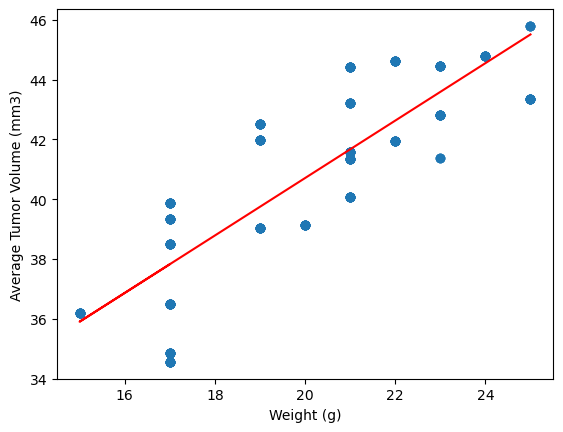

In [439]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = tumor_average_capomulin.iloc[:,4]
average_tumor = tumor_average_capomulin.iloc[:,8]
correlation = st.pearsonr(weight,average_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
x_values = weight
y_values = average_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()